In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('country_wise_latest.csv')
df.head(2)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe


In [3]:
df.shape

(187, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [5]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

#### We got no missing values and datatypes have no issues

In [6]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

In [8]:
df.columns

Index(['country/region', 'confirmed', 'deaths', 'recovered', 'active',
       'new_cases', 'new_deaths', 'new_recovered', 'deaths_/_100_cases',
       'recovered_/_100_cases', 'deaths_/_100_recovered',
       'confirmed_last_week', '1_week_change', '1_week_%_increase',
       'who_region'],
      dtype='object')

In [9]:
df.columns = df.columns.str.replace('/','')

In [10]:
df.columns

Index(['countryregion', 'confirmed', 'deaths', 'recovered', 'active',
       'new_cases', 'new_deaths', 'new_recovered', 'deaths__100_cases',
       'recovered__100_cases', 'deaths__100_recovered', 'confirmed_last_week',
       '1_week_change', '1_week_%_increase', 'who_region'],
      dtype='object')

#### Name for columns have been changed for better understanding.

## 1. Which countries are most affected by COVID-19?


In [28]:
# country wise covid cases
Country_wise_impact = df[['countryregion','confirmed', 'deaths', 'recovered', 'active','new_cases']].sort_values(by = 'confirmed', ascending = False)
Country_wise_impact.head(10)

,countryregion,confirmed,deaths,recovered,active,new_cases
173,US,4290259,148011,1325804,2816444,56336
23,Brazil,2442375,87618,1846641,508116,23284
79,India,1480073,33408,951166,495499,44457
138,Russia,816680,13334,602249,201097,5607
154,South Africa,452529,7067,274925,170537,7096
111,Mexico,395489,44022,303810,47657,4973
132,Peru,389717,18418,272547,98752,13756
35,Chile,347923,9187,319954,18782,2133
177,United Kingdom,301708,45844,1437,254427,688
81,Iran,293606,15912,255144,22550,2434


#### 1. US have more confirmed cases with some deaths.

## 2. How effective is recovery across different countries?


In [33]:
# country wise recovery vs death comparison
df['Recovered/100 cases'] = (df['recovered']/df['confirmed']) * 100
df['Deaths/100 Cases'] = (df['deaths']/df['confirmed']) * 100

Recovery_vs_deaths = df[['countryregion', 'Recovered/100 cases','Deaths/100 Cases']].sort_values(by = 'Recovered/100 cases', ascending = False)
Recovery_vs_deaths.head(15)

,countryregion,Recovered/100 cases,Deaths/100 Cases
75,Holy See,100.000000,0.000000
69,Grenada,100.000000,0.000000
49,Dominica,100.000000,0.000000
48,Djibouti,98.379126,1.146472
78,Iceland,98.327940,0.539374
24,Brunei,97.872340,2.127660
121,New Zealand,97.238279,1.412974
136,Qatar,97.017254,0.150552
105,Malaysia,96.597035,1.392633
110,Mauritius,96.511628,2.906977


<Figure size 1000x800 with 0 Axes>

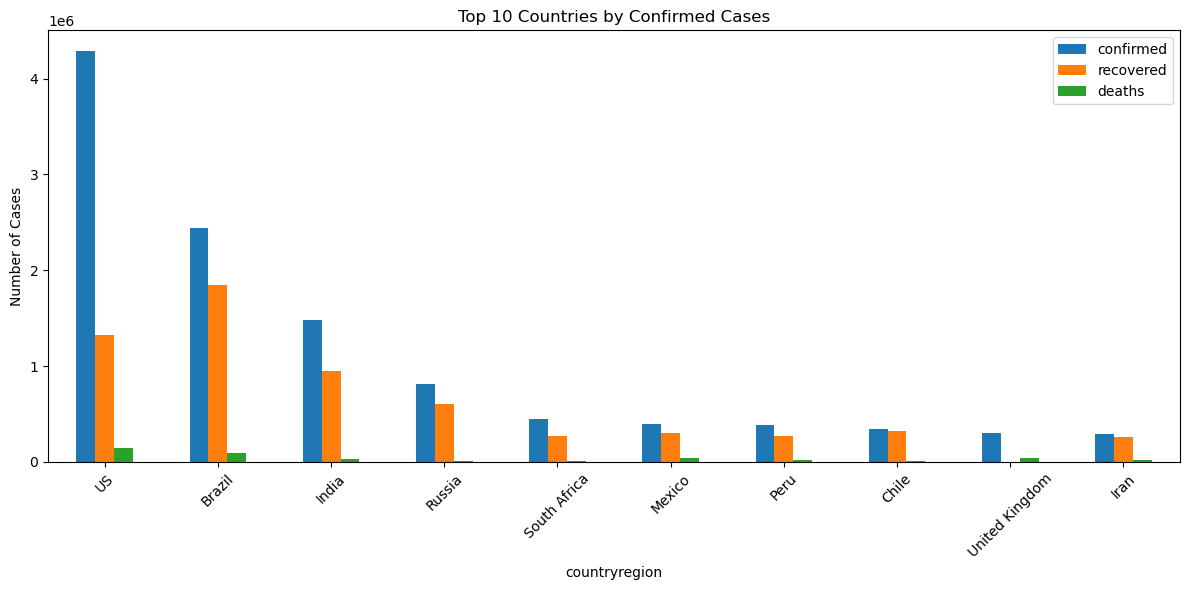

In [51]:
plt.figure(figsize=(10, 8))
df.sort_values('confirmed', ascending=False).head(10).plot(
    x='countryregion', y=['confirmed', 'recovered', 'deaths'], kind='bar', figsize=(12,6))
plt.title('Top 10 Countries by Confirmed Cases')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 2. US and Brazil seems have Many confirmed cases with some recovery. and India plays a good role with good recoveries by huge populations.

## 3. What are the current trends (1-week changes)?

In [49]:
weekly_rise = df[['countryregion', '1_week_change', '1_week_%_increase']].sort_values(by = '1_week_change', ascending = False).head(10)
weekly_rise

,countryregion,1_week_change,1_week_%_increase
173,US,455582,11.88
79,India,324735,28.11
23,Brazil,323729,15.28
154,South Africa,78901,21.12
37,Colombia,53096,26.03
111,Mexico,46093,13.19
138,Russia,40468,5.21
6,Argentina,36642,28.02
132,Peru,32036,8.96
13,Bangladesh,18772,9.05


In [50]:
weekly_rise_increase = df[['countryregion', '1_week_change', '1_week_%_increase']].sort_values(by = '1_week_%_increase', ascending = False).head(10)
weekly_rise_increase

,countryregion,1_week_change,1_week_%_increase
130,Papua New Guinea,43,226.32
63,Gambia,214,191.07
11,Bahamas,208,119.54
186,Zimbabwe,991,57.85
99,Libya,847,42.78
58,Ethiopia,4340,42.52
22,Botswana,217,41.57
97,Lesotho,146,40.67
160,Suriname,404,37.44
41,Costa Rica,4307,37.34


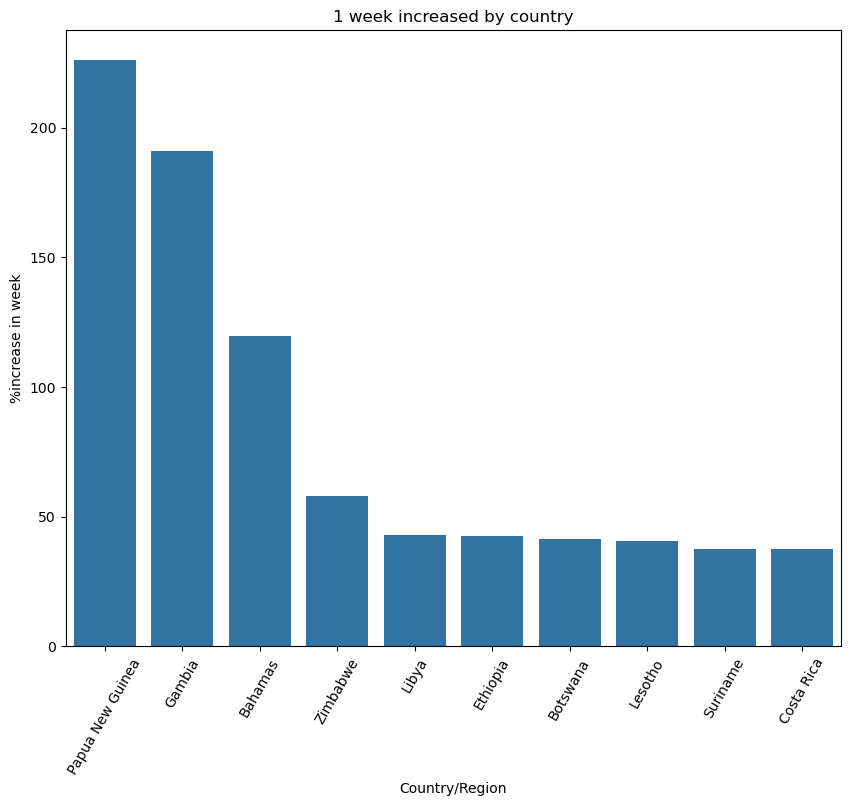

In [56]:
plt.figure(figsize=(10, 8))
sns.barplot(x = 'countryregion', y = '1_week_%_increase', data = weekly_rise_increase)
plt.title('1 week increased by country')
plt.xlabel('Country/Region')
plt.ylabel('%increase in week')
plt.xticks(rotation=60)
plt.show()

#### 3. The place called papua New Guinea seems more cases in a week.

## 4. Healthcare Outcomes

In [57]:
df.columns

Index(['countryregion', 'confirmed', 'deaths', 'recovered', 'active',
       'new_cases', 'new_deaths', 'new_recovered', 'deaths__100_cases',
       'recovered__100_cases', 'deaths__100_recovered', 'confirmed_last_week',
       '1_week_change', '1_week_%_increase', 'who_region',
       'Recovered/100 cases', 'Deaths/100 Cases'],
      dtype='object')

In [58]:
Health_care = df[['countryregion','deaths__100_cases','recovered__100_cases']].sort_values(by = 'recovered__100_cases', ascending = False).head(10)
Health_care

,countryregion,deaths__100_cases,recovered__100_cases
75,Holy See,0.00,100.00
69,Grenada,0.00,100.00
49,Dominica,0.00,100.00
48,Djibouti,1.15,98.38
78,Iceland,0.54,98.33
24,Brunei,2.13,97.87
121,New Zealand,1.41,97.24
136,Qatar,0.15,97.02
105,Malaysia,1.39,96.60
110,Mauritius,2.91,96.51


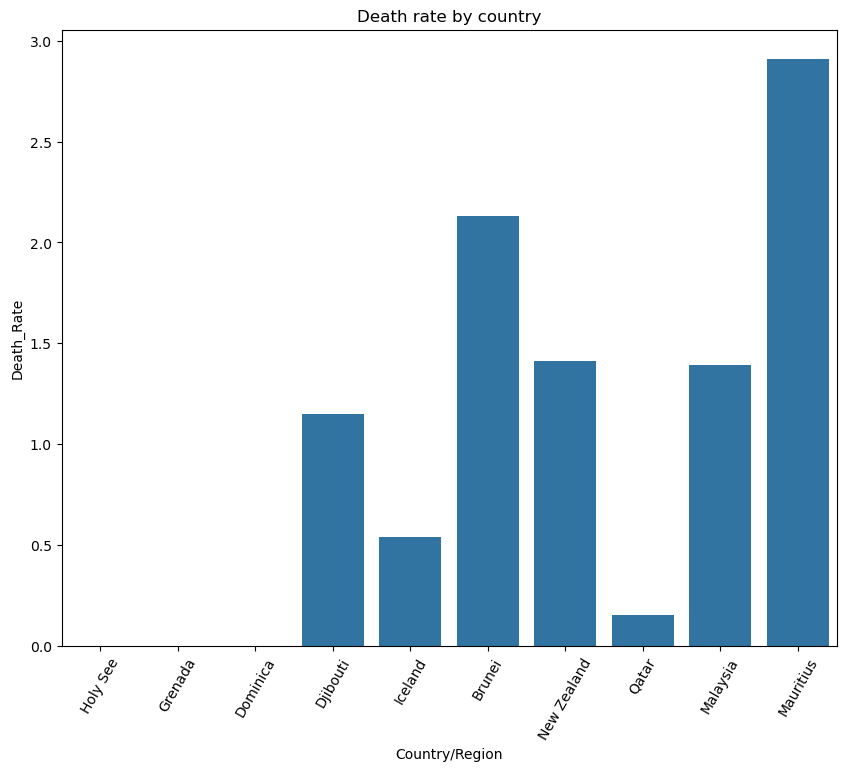

In [63]:
plt.figure(figsize=(10, 8))
sns.barplot(x = 'countryregion', y = 'deaths__100_cases', data = Health_care)
plt.title('Death rate by country')
plt.xlabel('Country/Region')
plt.ylabel('Death_Rate')
plt.xticks(rotation=60)
plt.show()

#### 4. The place called Holy see, Grenada, Dominica have good healthcare, got no deaths.

## 5.WHO Region Performance

In [66]:
who_region_data= df.groupby('who_region')[[
    'confirmed', 'deaths', 'recovered', '1_week_change', '1_week_%_increase']].sum()

# Add outcome ratios
who_region_data['Recovered/100 cases'] = (who_region_data['recovered'] / who_region_data['confirmed']) * 100
who_region_data['Deaths/100 Cases'] = (who_region_data['deaths'] / who_region_data['confirmed']) * 100

In [67]:
who_region_data['Recovered/100 cases']

who_region
Africa                   60.929305
Americas                 50.554038
Eastern Mediterranean    80.590631
Europe                   60.424583
South-East Asia          63.037917
Western Pacific          70.708003
Name: Recovered/100 cases, dtype: float64

In [68]:
who_region_data['Deaths/100 Cases']

who_region
Africa                   1.690111
Americas                 3.877372
Eastern Mediterranean    2.571803
Europe                   6.399228
South-East Asia          2.252987
Western Pacific          2.820865
Name: Deaths/100 Cases, dtype: float64